# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import chart_studio.plotly as py
import plotly.graph_objs as go
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=10000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (10000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
project_data['project_is_approved']

0       0
1       1
2       0
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      0
13      1
14      0
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      0
23      1
24      1
25      0
26      1
27      1
28      0
29      1
       ..
9970    1
9971    1
9972    1
9973    1
9974    1
9975    1
9976    0
9977    1
9978    1
9979    1
9980    1
9981    1
9982    1
9983    1
9984    1
9985    1
9986    1
9987    1
9988    1
9989    1
9990    0
9991    1
9992    1
9993    1
9994    1
9995    1
9996    1
9997    1
9998    1
9999    1
Name: project_is_approved, Length: 10000, dtype: int64

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [6]:
project_data.isnull().sum()


Unnamed: 0                                         0
id                                                 0
teacher_id                                         0
teacher_prefix                                     1
school_state                                       0
project_submitted_datetime                         0
project_grade_category                             0
project_subject_categories                         0
project_subject_subcategories                      0
project_title                                      0
project_essay_1                                    0
project_essay_2                                    0
project_essay_3                                 9689
project_essay_4                                 9689
project_resource_summary                           0
teacher_number_of_previously_posted_projects       0
project_is_approved                                0
dtype: int64

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[4000])
print(sent)
print("="*50)

I teach language arts and social studies to about 50 students each day.  I teach two groups of amazing kids each day!\r\n\r\nThe students in my classroom range from advanced or gifted learners to students with various learning disabilities. My school is located in an urban environment in Maryland. The school is a Title I (low-income) school, and 99% of the students in the school receive free and reduced price lunch. All students at my school receive free breakfast which is the most important meal of the day!High interest reading supports comprehension and learning. I want to encourage a love of reading by choosing books that interest my third grade students. Many of my students are classified as \"struggling readers\". There is extensive research to support the premise that the best way to become a better reader is to read more. In order for my students to become better or more fluent readers I need to increase both the quantity and quality of their reading.  They need reading material

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I teach language arts and social studies to about 50 students each day.  I teach two groups of amazing kids each day!    The students in my classroom range from advanced or gifted learners to students with various learning disabilities. My school is located in an urban environment in Maryland. The school is a Title I (low-income) school, and 99% of the students in the school receive free and reduced price lunch. All students at my school receive free breakfast which is the most important meal of the day!High interest reading supports comprehension and learning. I want to encourage a love of reading by choosing books that interest my third grade students. Many of my students are classified as  struggling readers . There is extensive research to support the premise that the best way to become a better reader is to read more. In order for my students to become better or more fluent readers I need to increase both the quantity and quality of their reading.  They need reading materials that

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I teach language arts and social studies to about 50 students each day I teach two groups of amazing kids each day The students in my classroom range from advanced or gifted learners to students with various learning disabilities My school is located in an urban environment in Maryland The school is a Title I low income school and 99 of the students in the school receive free and reduced price lunch All students at my school receive free breakfast which is the most important meal of the day High interest reading supports comprehension and learning I want to encourage a love of reading by choosing books that interest my third grade students Many of my students are classified as struggling readers There is extensive research to support the premise that the best way to become a better reader is to read more In order for my students to become better or more fluent readers I need to increase both the quantity and quality of their reading They need reading materials that they can read and wi

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 10000/10000 [00:18<00:00, 528.91it/s]


In [17]:
# after preprocesing
project_data['preprocessed_essays'] = preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|██████████| 10000/10000 [00:01<00:00, 8938.88it/s]


In [19]:
project_data['preprocessed_titles'] = preprocessed_title

In [20]:
#---------------------------------------------------------------------------------------
# Preprocessing Categorical Features: teacher_prefix
print(project_data['teacher_prefix'].value_counts())
print("="*100)

print(project_data[project_data['teacher_prefix'].isnull()]['teacher_prefix'])

print("="*100)
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')
print(project_data['teacher_prefix'].value_counts())

print("="*100)
#---------------------------------------------------------------------------------------

Mrs.       5120
Ms.        3647
Mr.        1006
Teacher     226
Name: teacher_prefix, dtype: int64
7820    NaN
Name: teacher_prefix, dtype: object
Mrs.       5121
Ms.        3647
Mr.        1006
Teacher     226
Name: teacher_prefix, dtype: int64


## 1.5 Preparing data for models

In [21]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'preprocessed_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [22]:
def VectorizingData(sFeature, project_data_fitting,project_data_transform):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_feature = CountVectorizer(lowercase=False, binary=True)
    vectorizer_feature.fit(project_data_fitting[sFeature].values) #fitting has to be on Train data

    transform_one_hot = vectorizer_feature.transform(project_data_transform[sFeature].values)
    #print(vectorizer_cat.get_feature_names())
    return(transform_one_hot)

In [23]:
train_categories_one_hot = VectorizingData("clean_categories",project_data, project_data)
print("Shape of matrix after one hot encodig ",train_categories_one_hot.shape)

Shape of matrix after one hot encodig  (10000, 9)


In [24]:
train_subcategories_one_hot = VectorizingData("clean_subcategories",project_data, project_data)
print("Shape of matrix after one hot encodig ",train_subcategories_one_hot.shape)

Shape of matrix after one hot encodig  (10000, 30)


In [25]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
train_school_state_one_hot = VectorizingData("school_state",project_data, project_data)
print("Shape of matrix after one hot encodig ",train_school_state_one_hot.shape)

Shape of matrix after one hot encodig  (10000, 51)


In [26]:
train_teacher_prefix_one_hot = VectorizingData("teacher_prefix",project_data, project_data)
print("Shape of matrix after one hot encodig ",train_teacher_prefix_one_hot.shape)

Shape of matrix after one hot encodig  (10000, 4)


In [27]:
train_project_grade_one_hot = VectorizingData("project_grade_category",project_data, project_data)
print("Shape of matrix after one hot encodig ",train_project_grade_one_hot.shape)

Shape of matrix after one hot encodig  (10000, 3)


### 1.5.2 Vectorizing Text data

#### 1.5.2.2 TFIDF vectorizer

In [28]:
def tfidf_Vectorizer(sFeature, project_data_fitting,project_data_transform):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer_tfidf_feature = TfidfVectorizer(min_df=10)
    vectorizer_tfidf_feature.fit(project_data[sFeature])      #Fitting has to be on Train data

    tfidf_vect = vectorizer_tfidf_feature.transform(project_data_transform[sFeature].values)
    return(tfidf_vect)

In [29]:
essay_tfidf = tfidf_Vectorizer('preprocessed_essays',  project_data, project_data)
print("Shape of matrix after one hot encodig ",essay_tfidf.shape)

Shape of matrix after one hot encodig  (10000, 6213)


In [30]:
titles_tfidf = tfidf_Vectorizer('preprocessed_titles',   project_data,  project_data)
print("Shape of matrix after one hot encodig ",titles_tfidf.shape)

Shape of matrix after one hot encodig  (10000, 671)


### 1.5.3 Vectorizing Numerical features

In [31]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [32]:
from sklearn.preprocessing import Normalizer
normalizer1 = Normalizer()

prvs_posted_prjcts_norm = normalizer1.fit_transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(prvs_posted_prjcts_norm.shape)

(10000, 1)


In [33]:
prvs_posted_prjcts_norm

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [34]:
from sklearn.preprocessing import Normalizer
normalizer2 = Normalizer()

price_norm = normalizer2.fit_transform(project_data['price'].values.reshape(-1,1))

print(price_norm.shape)

(10000, 1)


In [35]:
from sklearn.preprocessing import Normalizer
normalizer3 = Normalizer()

quantity_norm = normalizer3.fit_transform(project_data['quantity'].values.reshape(-1,1))

print(quantity_norm.shape)

(10000, 1)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [36]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((prvs_posted_prjcts_norm, price_norm, quantity_norm, titles_tfidf, essay_tfidf, train_project_grade_one_hot, train_teacher_prefix_one_hot,train_school_state_one_hot,train_subcategories_one_hot, train_categories_one_hot))
print(X.shape)
label = project_data['project_is_approved']
print(label.shape)

(10000, 6984)
(10000,)


# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features.
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● As this is very computationally expensive, take <b>5k</b> datapoints only to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● Take <b>5k</b> datapoints only.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [37]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
from sklearn.feature_selection import SelectKBest, chi2

#selecting 5000 features from  data
#chi-squared stats  used to select max non negetive features
newdata =SelectKBest(chi2, k=5000).fit_transform(X,label)


print("*"*60)
print('after select 500 features from set2:')
print(newdata.shape)

************************************************************
after select 500 features from set2:
(10000, 5000)


In [38]:

#we are selecting 20k Datapoints
newdata = newdata[:5000]


<h2>2.5 Apply Kmeans</h2>

100%|██████████| 8/8 [21:06<00:00, 158.27s/it]


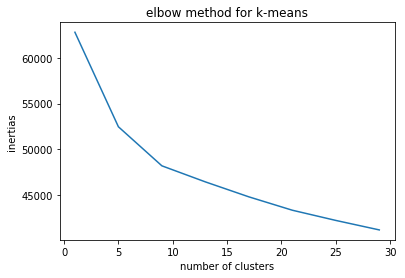

In [69]:
# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

from sklearn.cluster import KMeans

inertias = []
K = range(1,30,4)    # k(clusters) values 1 to 30  with 4 steps 

for i in  tqdm(K):
    
    model = KMeans(n_clusters=i, init='k-means++', n_init=2,tol=0.0001, algorithm='auto',n_jobs=-1)
    
    model.fit(X)    #model fit on data 
    
    inertias.append(model.inertia_)

    
#elbow plot
plt.plot(K,inertias)
plt.title('elbow method for k-means')
plt.xlabel('number of clusters')
plt.ylabel('inertias')
plt.show()

In [102]:
#apply k-mean(with best hyper parameter k value) on our dataset 
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 10,init='k-means++', n_init=2,tol=0.0001, algorithm='auto',n_jobs=-1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=4, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [104]:
# predict the clusters on data
clustrs = model.fit_predict(X)
clustrs.shape


(10000,)

In [106]:
#https://www.geeksforgeeks.org/counters-in-python-set-2-accessing-counters/
from collections import Counter 

count = clustrs
col_count = Counter(count) 
print(col_count)

Counter({5: 1411, 6: 1282, 2: 1091, 1: 1041, 9: 971, 7: 959, 4: 917, 3: 808, 8: 792, 0: 728})


In [112]:
#constructing dataframe with essay data
df = pd.DataFrame(project_data['preprocessed_essays'])

#appending model predicted cluster values  to the dataframe
df ['clusters'] = clustrs

df.head(3)

,preprocessed_essays,clusters
0,my students english learners working english s...,6
1,our students arrive school eager learn they po...,2
2,true champions not always ones win guts by mia...,2


### Class1

In [113]:
#now selection only cluster 2  datapoints
df_class1 = df [df['clusters']==1]

print("dataframe shape:",df_class1.shape)

df_class1.head(4)

dataframe shape: (1041, 2)


,preprocessed_essays,clusters
17,my students special come variety backgrounds i...,1
36,i teaching first grade year brand new group aw...,1
41,my first graders year lovable energetic social...,1
48,the students school come mainly low income hig...,1


len of cluster 2 essay_text: 1064610


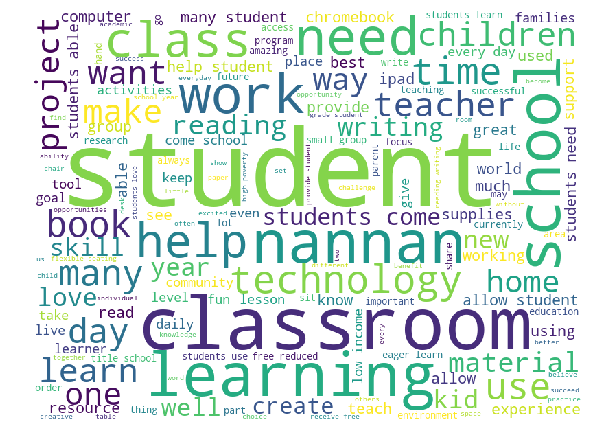

In [117]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud

total_words=' '
for i in df_class1.preprocessed_essays:
        total_words = total_words+i+' '
        
print("len of cluster 2 essay_text:",len(total_words))
      
wordcloud = WordCloud(width = 800, height = 600, background_color ='white', min_font_size = 10).generate(total_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Class2

In [119]:
#now selection only cluster 2  datapoints
df_class2 = df [df['clusters']==2]

print("dataframe shape:",df_class2.shape)

df_class2.head(4)

dataframe shape: (1091, 2)


,preprocessed_essays,clusters
1,our students arrive school eager learn they po...,2
2,true champions not always ones win guts by mia...,2
8,my students enthusiastic inquisitive learners ...,2
15,located west dallas students face several chal...,2


len of cluster 2 essay_text: 1188335


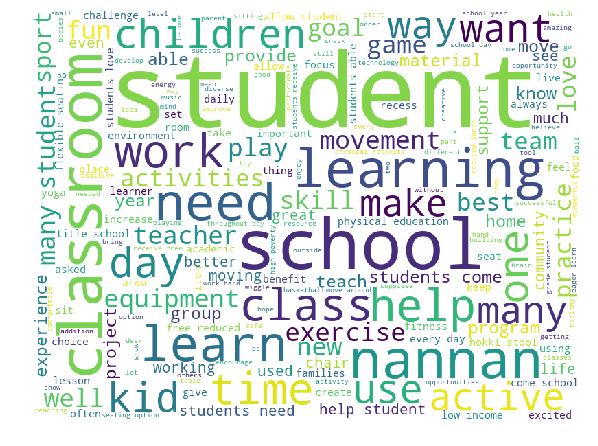

In [120]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud

total_words=' '
for i in df_class2.preprocessed_essays:
        total_words = total_words+i+' '
        
print("len of cluster 2 essay_text:",len(total_words))
      
wordcloud = WordCloud(width = 800, height = 600, background_color ='white', min_font_size = 10).generate(total_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Class3

In [122]:
#now selection only cluster 2  datapoints
df_class3 = df [df['clusters']==3]

print("dataframe shape:",df_class3.shape)

df_class3.head(4)

dataframe shape: (808, 2)


,preprocessed_essays,clusters
3,i work unique school filled esl english second...,3
26,i teach 22 bright 5 6 year olds my students at...,3
102,hello thank wanting learn class my students de...,3
113,my students pre k students meaning many first ...,3


len of cluster 2 essay_text: 846388


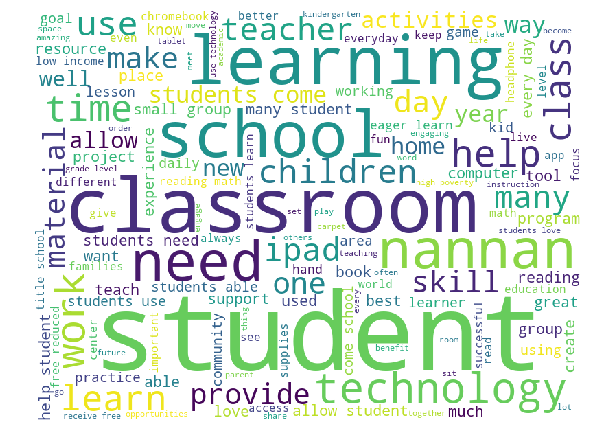

In [123]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud

total_words=' '
for i in df_class3.preprocessed_essays:
        total_words = total_words+i+' '
        
print("len of cluster 2 essay_text:",len(total_words))
      
wordcloud = WordCloud(width = 800, height = 600, background_color ='white', min_font_size = 10).generate(total_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

<h2>2.6 Apply AgglomerativeClustering</h2>

In [90]:

newdata_mtr2 = newdata[:5000]
newdata= newdata_mtr2.todense()  # dense data is required or agglomerative cluster
newdata.shape

(5000, 5000)

In [125]:
# our data : newdata_mtr1

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', compute_full_tree='auto', linkage='average') #linkage='single' based on  the minimum of the distances between all observations of the two sets

agg_model.fit(newdata)

# predict the clusters on data
clustrs_yi = agg_model.fit_predict(newdata)

clustrs_yi

array([0, 3, 4, ..., 0, 1, 4], dtype=int64)

In [126]:
#https://www.geeksforgeeks.org/counters-in-python-set-2-accessing-counters/
from collections import Counter 

z = clustrs_yi
col_count = Counter(z) 
print(col_count)

Counter({0: 3712, 4: 618, 1: 607, 2: 58, 3: 5})


In [130]:
project_data = project_data[:5000]
#constructing dataframe with essay data
df = pd.DataFrame(project_data['preprocessed_essays'])

#appending model predicted cluster values  to the dataframe
df ['clusters'] = clustrs_yi

df.head(3)

,preprocessed_essays,clusters
0,my students english learners working english s...,0
1,our students arrive school eager learn they po...,3
2,true champions not always ones win guts by mia...,4


In [137]:
#now selection only cluster 2  datapoints
df_class0 = df [df['clusters']==0]

print("dataframe shape:",df_class0.shape)

df_class0.head(4)

dataframe shape: (3712, 2)


,preprocessed_essays,clusters
0,my students english learners working english s...,0
3,i work unique school filled esl english second...,0
4,our second grade classroom next year made arou...,0
7,not students struggle poverty also learning ma...,0


len of cluster 2 essay_text: 3928548


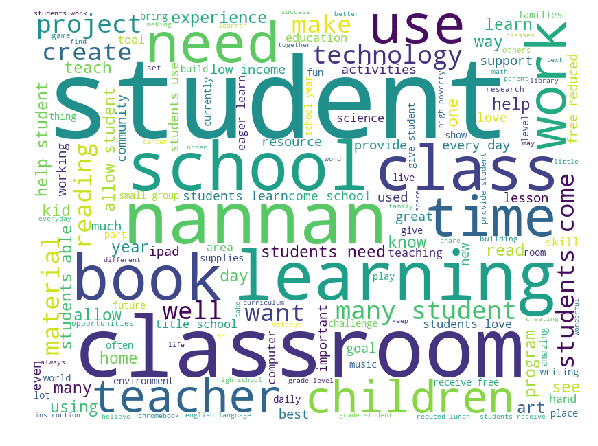

In [136]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud

total_words=' '
for i in df_class0.preprocessed_essays:
        total_words = total_words+i+' '
        
print("len of cluster 2 essay_text:",len(total_words))
      
wordcloud = WordCloud(width = 800, height = 600, background_color ='white', min_font_size = 10).generate(total_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [138]:
#now selection only cluster 2  datapoints
df_class4 = df [df['clusters']==4]

print("dataframe shape:",df_class4.shape)

df_class4.head(4)

dataframe shape: (618, 2)


,preprocessed_essays,clusters
2,true champions not always ones win guts by mia...,4
8,my students enthusiastic inquisitive learners ...,4
15,located west dallas students face several chal...,4
19,we apart urban district many students come fin...,4


len of cluster 2 essay_text: 680518


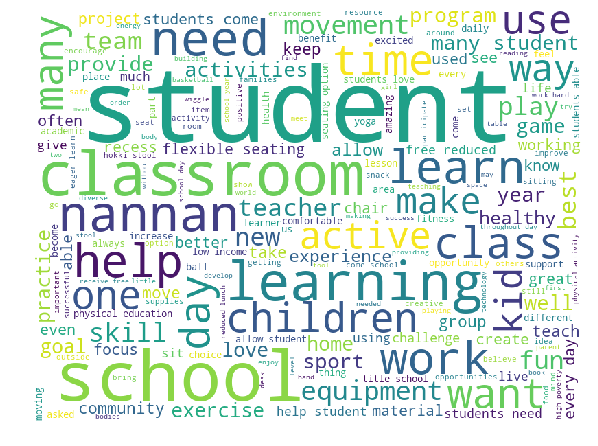

In [140]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud

total_words=' '
for i in df_class4.preprocessed_essays:
        total_words = total_words+i+' '
        
print("len of cluster 2 essay_text:",len(total_words))
      
wordcloud = WordCloud(width = 800, height = 600, background_color ='white', min_font_size = 10).generate(total_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [141]:
#now selection only cluster 2  datapoints
df_class1 = df [df['clusters']==1]

print("dataframe shape:",df_class1.shape)

df_class1.head(4)

dataframe shape: (607, 2)


,preprocessed_essays,clusters
5,i moving 2nd grade 3rd grade beginning next sc...,1
6,my students dynamic energetic group middle sch...,1
13,i teach small school district central oklahoma...,1
16,my preschool children ages 3 5 years old autis...,1


len of cluster 2 essay_text: 663790


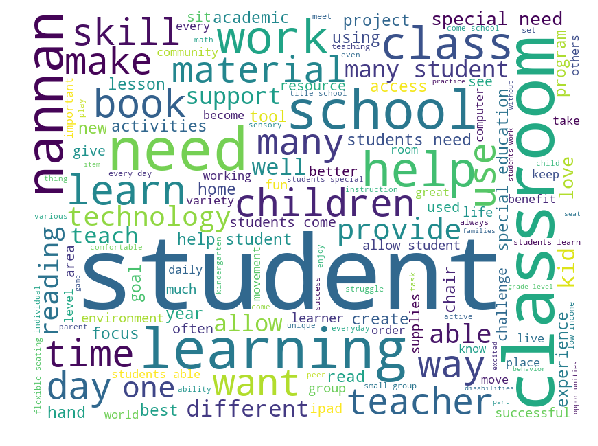

In [142]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud

total_words=' '
for i in df_class1.preprocessed_essays:
        total_words = total_words+i+' '
        
print("len of cluster 2 essay_text:",len(total_words))
      
wordcloud = WordCloud(width = 800, height = 600, background_color ='white', min_font_size = 10).generate(total_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

###  AgglomerativeClustering with cluster = 2

In [143]:
# our data : newdata_mtr1

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', compute_full_tree='auto', linkage='average') #linkage='single' based on  the minimum of the distances between all observations of the two sets

agg_model.fit(newdata)

# predict the clusters on data
clustrs_yi = agg_model.fit_predict(newdata)

clustrs_yi

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
#https://www.geeksforgeeks.org/counters-in-python-set-2-accessing-counters/
from collections import Counter 

z = clustrs_yi
col_count = Counter(z) 
print(col_count)

Counter({0: 4995, 1: 5})


<h2>2.7 Apply DBSCAN</h2>

In [64]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(newdata)
distances, indices = nbrs.kneighbors(newdata)

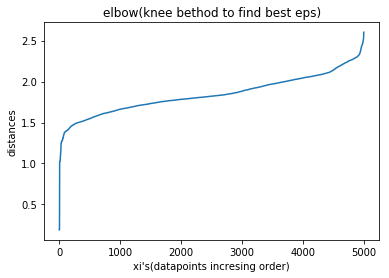

In [65]:
distances = np.sort(distances, axis = 0)  # sort all distances values 

distances = distances[:,1]

plt.plot(distances)
plt.title('elbow(knee bethod to find best eps)')
plt.xlabel("xi's(datapoints incresing order)")
plt.ylabel('distances')
plt.show()

### 2. eps = 2 , min_samples = 20

In [42]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=2, min_samples=20, metric='euclidean', algorithm='auto',  n_jobs=-1) 
dbscan_model.fit(newdata)

# predict the clusters on data
clustrs_yi = dbscan_model.fit_predict(newdata)

clustrs_yi

array([ 0, -1, -1, ...,  0, -1, -1], dtype=int64)

In [43]:

#we can observe houmany datapoints belongs to each cluster
#https://www.geeksforgeeks.org/counters-in-python-set-2-accessing-counters/
from collections import Counter 

z = clustrs_yi
col_count = Counter(z) 
print(col_count)

Counter({-1: 2793, 0: 1865, 1: 224, 2: 59, 3: 38, 4: 21})


### 2. eps = 2 , min_samples = 60

In [45]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=2, min_samples=60, metric='euclidean', algorithm='auto',  n_jobs=-1) 
dbscan_model.fit(newdata)

# predict the clusters on data
clustrs_yi = dbscan_model.fit_predict(newdata)

clustrs_yi

array([-1, -1, -1, ...,  0, -1, -1], dtype=int64)

In [46]:

#we can observe houmany datapoints belongs to each cluster
#https://www.geeksforgeeks.org/counters-in-python-set-2-accessing-counters/
from collections import Counter 

z = clustrs_yi
col_count = Counter(z) 
print(col_count)

Counter({-1: 3620, 0: 1227, 1: 153})


In [47]:
project_data = project_data[:5000]
#constructing dataframe with essay data
df = pd.DataFrame(project_data['preprocessed_essays'])

#appending model predicted cluster values  to the dataframe
df ['clusters'] = clustrs_yi

df.head(3)

,preprocessed_essays,clusters
0,my students english learners working english s...,-1
1,our students arrive school eager learn they po...,-1
2,true champions not always ones win guts by mia...,-1


In [50]:

#now selection only cluster 2  datapoints
df_class = df [df['clusters']==-1]

print("dataframe shape:",df_class.shape)

df_class.head(4)

dataframe shape: (3620, 2)


,preprocessed_essays,clusters
0,my students english learners working english s...,-1
1,our students arrive school eager learn they po...,-1
2,true champions not always ones win guts by mia...,-1
5,i moving 2nd grade 3rd grade beginning next sc...,-1


len of cluster 2 essay_text: 3907701


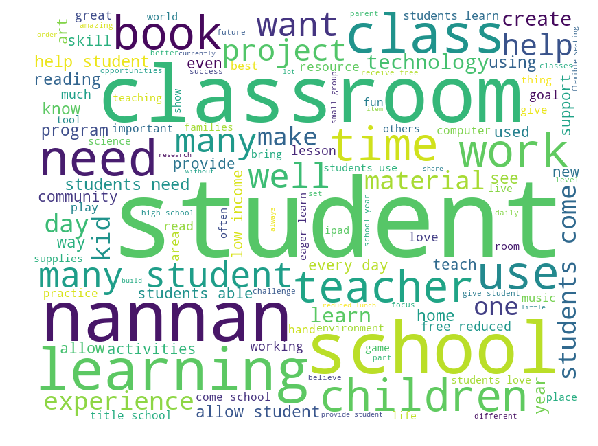

In [51]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud

total_words=' '
for i in df_class.preprocessed_essays:
        total_words = total_words+i+' '
        
print("len of cluster 2 essay_text:",len(total_words))
      
wordcloud = WordCloud(width = 800, height = 600, background_color ='white', min_font_size = 10).generate(total_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [53]:

#now selection only cluster 2  datapoints
df_class0 = df [df['clusters']==0]

print("dataframe shape:",df_class0.shape)

df_class0.head(4)

dataframe shape: (1227, 2)


,preprocessed_essays,clusters
3,i work unique school filled esl english second...,0
4,our second grade classroom next year made arou...,0
7,not students struggle poverty also learning ma...,0
10,there many little ways enlarge world love book...,0


len of cluster 2 essay_text: 1261191


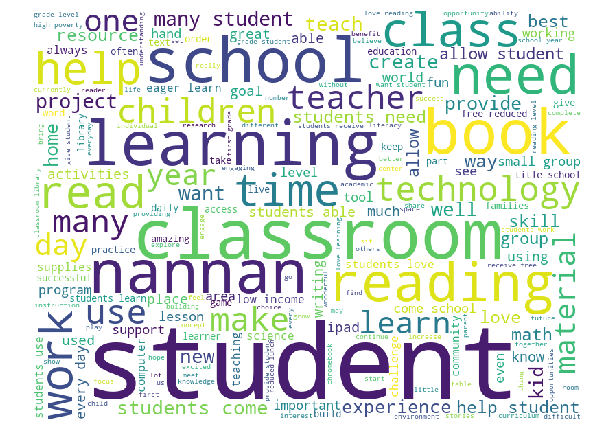

In [54]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud

total_words=' '
for i in df_class0.preprocessed_essays:
        total_words = total_words+i+' '
        
print("len of cluster 2 essay_text:",len(total_words))
      
wordcloud = WordCloud(width = 800, height = 600, background_color ='white', min_font_size = 10).generate(total_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

<h1>3. Cocnlusions</h1>
<br> Please write down few lines of your observations on this assignment.

In [59]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
a = PrettyTable()
a.field_names = ["Clustering Technique(algorithm)","n_clusters","best_epsilon","min_samples","Method"]

a.add_row(["K-Means", 10,"-","-","k-Means++"])
a.add_row(["Agglomerative clustering", "5 & 2","-","-","Average"])
a.add_row(["DBSCAN", "5 & 3",2,"20 & 60","auto" ])

print(a)

+---------------------------------+------------+--------------+-------------+-----------+
| Clustering Technique(algorithm) | n_clusters | best_epsilon | min_samples |   Method  |
+---------------------------------+------------+--------------+-------------+-----------+
|             K-Means             |     10     |      -       |      -      | k-Means++ |
|     Agglomerative clustering    |   5 & 2    |      -       |      -      |  Average  |
|              DBSCAN             |   5 & 3    |      2       |   20 & 60   |    auto   |
+---------------------------------+------------+--------------+-------------+-----------+
